# Simple Curve fit code f(x) = x^2

## Basic libraries for neural network and visualization

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Generate data 

In [ ]:
# Generate training data
x = torch.linspace(0, 1, 100).view(-1, 1)  # Inputs
y = x**2  # Quadratic outputs


## Generate Neural network

In [3]:

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )
    
    def forward(self, x):
        return self.fc(x)


Epoch 0, Loss: 3.422267198562622
Epoch 100, Loss: 0.030527325347065926
Epoch 200, Loss: 0.0026887368876487017
Epoch 300, Loss: 0.0012178622419014573
Epoch 400, Loss: 0.0005623103934340179
Epoch 500, Loss: 0.00026453097234480083
Epoch 600, Loss: 0.00014219387958291918
Epoch 700, Loss: 9.24049672903493e-05
Epoch 800, Loss: 6.831229984527454e-05
Epoch 900, Loss: 5.360196519177407e-05


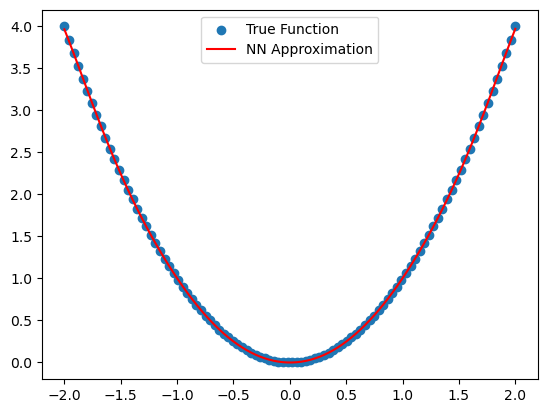

In [4]:
# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot results
with torch.no_grad():
    y_pred = model(x)
plt.scatter(x.numpy(), y.numpy(), label='True Function')
plt.plot(x.numpy(), y_pred.numpy(), label='NN Approximation', color='red')
plt.legend()
plt.show()
